### Task 1: Data Profiling to Understand Data Quality
**Description**: Use basic statistical methods to profile a dataset and identify potential quality issues.

**Steps**:
1. Load the dataset using pandas in Python.
2. Understand the data by checking its basic statistics.
3. Identify null values.
4. Check unique values for categorical columns.
5. Review outliers using box plots.

Loaded DataFrame:
   ID  Gender   Age   Income       City  Score Category
0   1    Male  25.0  50000.0  Bangalore     85        A
1   2  Female  30.0  60000.0     Mumbai     78        B
2   3    Male   NaN  75000.0      Delhi     92        A
3   4  Female  40.0  80000.0  Bangalore     68        C
4   5    Male  22.0  55000.0    Chennai     80        B
5   6  Female  35.0      NaN     Mumbai     75        A
6   7    Male  28.0  65000.0      Delhi     88        B
7   8  Female  32.0  70000.0  Bangalore     95        C
8   9    Male  45.0  90000.0     Mumbai     70        A
9  10    Male  27.0  52000.0    Chennai     82        B


Basic Statistics:
             ID        Age        Income      Score
count  10.00000   9.000000      9.000000  10.000000
mean    5.50000  31.555556  66333.333333  81.300000
std     3.02765   7.367345  13592.277219   8.932463
min     1.00000  22.000000  50000.000000  68.000000
25%     3.25000  27.000000  55000.000000  75.750000
50%     5.50000  30.000000  65000.

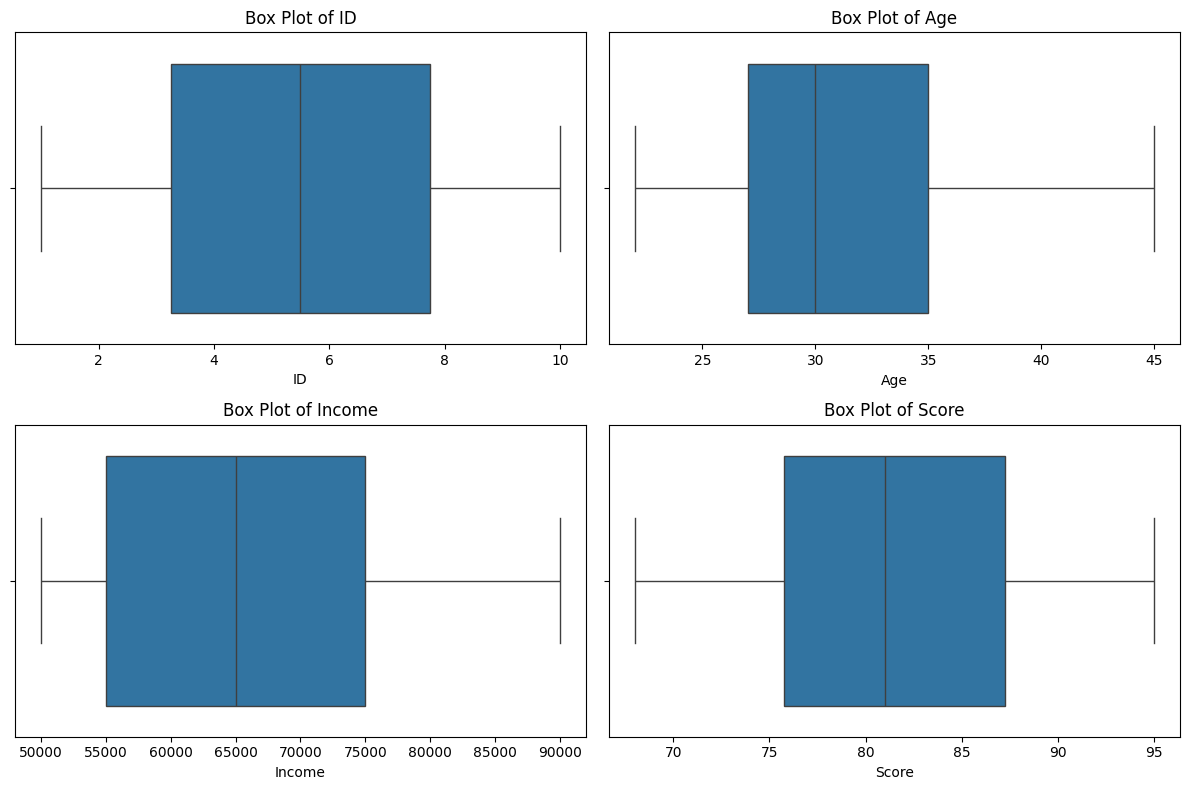

In [1]:
# write your code from here corrected 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset using pandas in Python.
# Replace this with your actual data loading
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male'],
    'Age': [25, 30, np.nan, 40, 22, 35, 28, 32, 45, 27],
    'Income': [50000, 60000, 75000, 80000, 55000, np.nan, 65000, 70000, 90000, 52000],
    'City': ['Bangalore', 'Mumbai', 'Delhi', 'Bangalore', 'Chennai', 'Mumbai', 'Delhi', 'Bangalore', 'Mumbai', 'Chennai'],
    'Score': [85, 78, 92, 68, 80, 75, 88, 95, 70, 82],
    'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'B', 'C', 'A', 'B']
}
df = pd.DataFrame(data)

print("Loaded DataFrame:")
print(df)
print("\n" + "="*30 + "\n")

# Step 2: Understand the data by checking its basic statistics.
print("Basic Statistics:")
print(df.describe())
print("\n" + "="*30 + "\n")

# Step 3: Identify null values.
print("Null Values:")
print(df.isnull().sum())
print("\n" + "="*30 + "\n")

# Step 4: Check unique values for categorical columns.
categorical_cols = df.select_dtypes(include='object').columns
print("Unique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"Column '{col}': {df[col].nunique()} unique values - {df[col].unique()}")
print("\n" + "="*30 + "\n")

# Step 5: Review outliers using box plots.
numerical_cols = df.select_dtypes(include=np.number).columns
print("Box Plots for Numerical Columns:")
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, len(numerical_cols) // 2 + (len(numerical_cols) % 2), i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


### Task 2: Implement Simple Data Validation
**Description**: Write a Python script to validate the data types and constraints of each column in a dataset.

**Steps**:
1. Define constraints for each column.
2. Validate each column based on its constraints.

In [2]:
# write your code from here corrected 
import pandas as pd
import numpy as np

def validate_data(df: pd.DataFrame, constraints: dict) -> dict:
    """
    Validates the data types and constraints of each column in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to validate.
        constraints (dict): A dictionary defining the constraints for each column.
                           The keys are column names, and the values are dictionaries
                           specifying the expected 'dtype' and other constraints
                           (e.g., 'min', 'max', 'allowed_values').

    Returns:
        dict: A dictionary containing the validation results for each column.
              Keys are column names, and values are lists of validation errors
              found in that column.
    """
    validation_errors = {}
    for col, rules in constraints.items():
        validation_errors[col] = []
        if col not in df.columns:
            validation_errors[col].append(f"Column '{col}' not found in DataFrame.")
            continue

        series = df[col]

        # Validate data type
        expected_dtype = rules.get('dtype')
        if expected_dtype:
            try:
                if expected_dtype == 'int':
                    if not pd.api.types.is_integer_dtype(series):
                        validation_errors[col].append(f"Column '{col}' should be of integer type, but is {series.dtype}.")
                elif expected_dtype == 'float':
                    if not pd.api.types.is_float_dtype(series):
                        validation_errors[col].append(f"Column '{col}' should be of float type, but is {series.dtype}.")
                elif expected_dtype == 'datetime':
                    try:
                        pd.to_datetime(series, errors='raise')
                    except Exception:
                        validation_errors[col].append(f"Column '{col}' should be of datetime type, but contains invalid formats.")
                elif expected_dtype == 'category':
                    pass # pandas 'category' dtype can handle various underlying types
                elif expected_dtype == 'object':
                    pass # 'object' is a general type, further constraints might be needed
                elif expected_dtype != str(series.dtype):
                    validation_errors[col].append(f"Column '{col}' should be of type '{expected_dtype}', but is '{series.dtype}'.")
            except AttributeError:
                validation_errors[col].append(f"Invalid dtype specified for column '{col}': {expected_dtype}")

        # Validate minimum value
        min_val = rules.get('min')
        if min_val is not None and pd.api.types.is_numeric_dtype(series):
            invalid_min = series[series < min_val]
            if not invalid_min.empty:
                validation_errors[col].append(f"Values in column '{col}' are below the minimum allowed value ({min_val}): {invalid_min.tolist()}")

        # Validate maximum value
        max_val = rules.get('max')
        if max_val is not None and pd.api.types.is_numeric_dtype(series):
            invalid_max = series[series > max_val]
            if not invalid_max.empty:
                validation_errors[col].append(f"Values in column '{col}' exceed the maximum allowed value ({max_val}): {invalid_max.tolist()}")

        # Validate allowed values (for categorical columns)
        allowed_values = rules.get('allowed_values')
        if allowed_values and pd.api.types.is_object_dtype(series):
            invalid_values = series[~series.isin(allowed_values)]
            if not invalid_values.empty:
                validation_errors[col].append(f"Values in column '{col}' are not in the allowed set ({allowed_values}): {invalid_values.unique().tolist()}")

        # Add more validation rules as needed (e.g., regex patterns, unique values)

        if not validation_errors[col]:
            validation_errors[col].append("Column passed validation.")

    return validation_errors

# Step 1: Define constraints for each column.
data_constraints = {
    'ID': {'dtype': 'int', 'min': 1},
    'Gender': {'dtype': 'category', 'allowed_values': ['Male', 'Female']},
    'Age': {'dtype': 'int', 'min': 18, 'max': 100},
    'Income': {'dtype': 'float', 'min': 0},
    'City': {'dtype': 'object'},
    'Score': {'dtype': 'int', 'min': 0, 'max': 100},
    'Category': {'dtype': 'category', 'allowed_values': ['A', 'B', 'C']}
}

# Step 2: Validate each column based on its constraints.
# Load a sample DataFrame (replace with your actual loading)
data = {
    'ID': [1, 2, 0, 4, 5],
    'Gender': ['Male', 'Female', 'Other', 'Female', 'Male'],
    'Age': [25, 15, 30, 110, 22],
    'Income': [50000.0, -100, 75000.0, 80000.0, np.nan],
    'City': ['Bangalore', 'Mumbai', 'Delhi', 'Bangalore', 'Chennai'],
    'Score': [85, 78, 105, 68, 80],
    'Category': ['A', 'B', 'D', 'C', 'B']
}
df = pd.DataFrame(data)

validation_results = validate_data(df, data_constraints)

print("Data Validation Results:")
for column, errors in validation_results.items():
    print(f"\nColumn '{column}':")
    for error in errors:
        print(f"- {error}")

Data Validation Results:

Column 'ID':
- Values in column 'ID' are below the minimum allowed value (1): [0]

Column 'Gender':
- Values in column 'Gender' are not in the allowed set (['Male', 'Female']): ['Other']

Column 'Age':
- Values in column 'Age' are below the minimum allowed value (18): [15]
- Values in column 'Age' exceed the maximum allowed value (100): [110]

Column 'Income':
- Values in column 'Income' are below the minimum allowed value (0): [-100.0]

Column 'City':
- Column passed validation.

Column 'Score':
- Values in column 'Score' exceed the maximum allowed value (100): [105]

Column 'Category':
- Values in column 'Category' are not in the allowed set (['A', 'B', 'C']): ['D']


### Task 3: Detect Missing Data Patterns
**Description**: Analyze and visualize missing data patterns in a dataset.

**Steps**:
1. Visualize missing data using a heatmap.
2. Identify patterns in missing data.

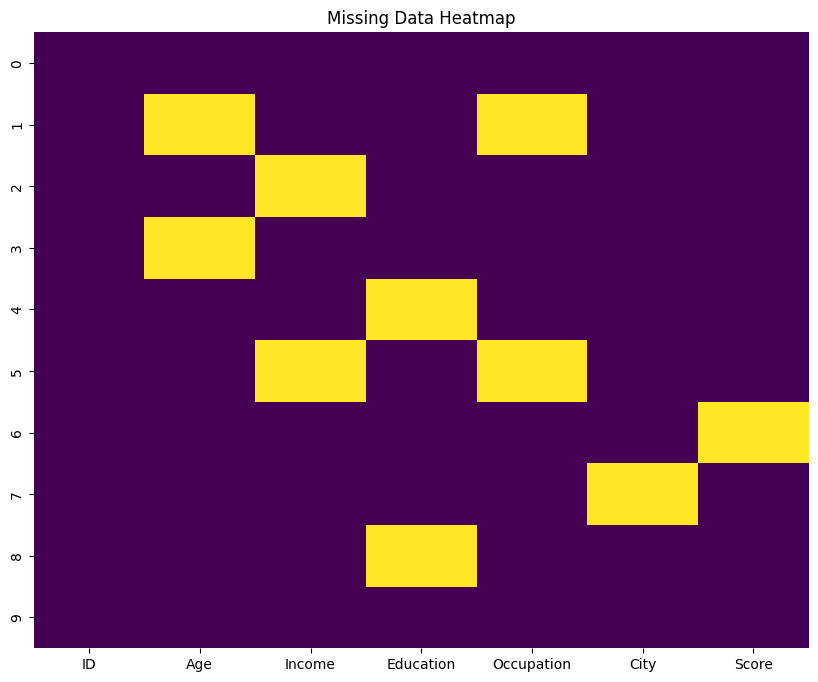

Missing Data Summary:
            Missing Count  Missing Percentage
Age                     2                20.0
Income                  2                20.0
Education               2                20.0
Occupation              2                20.0
City                    1                10.0
Score                   1                10.0


Co-occurrence of Missing Values:
Columns '('Education',)': 2 missing rows
Columns '('Age', 'Occupation')': 1 missing rows
Columns '('Income',)': 1 missing rows
Columns '('Age',)': 1 missing rows
Columns '('Income', 'Occupation')': 1 missing rows
Columns '('Score',)': 1 missing rows
Columns '('City',)': 1 missing rows


Percentage of missing values in 'Occupation' when 'Age' is missing: 50.00%
Percentage of missing values in 'Occupation' when 'Income' is missing: 50.00%
Percentage of missing values in 'Age' when 'Occupation' is missing: 50.00%
Percentage of missing values in 'Income' when 'Occupation' is missing: 50.00%




In [3]:
# write your code from here corrected 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def visualize_missing_heatmap(df: pd.DataFrame):
    """
    Visualizes missing data in a DataFrame using a heatmap.

    Args:
        df (pd.DataFrame): The input DataFrame.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Data Heatmap')
    plt.show()
def identify_missing_patterns(df: pd.DataFrame):
    """
    Identifies potential patterns in missing data.

    Args:
        df (pd.DataFrame): The input DataFrame.
    """
    null_counts = df.isnull().sum().sort_values(ascending=False)
    total_rows = len(df)
    missing_percentage = (null_counts / total_rows) * 100

    print("Missing Data Summary:")
    missing_info = pd.DataFrame({'Missing Count': null_counts, 'Missing Percentage': missing_percentage})
    print(missing_info[missing_info['Missing Count'] > 0])
    print("\n" + "="*30 + "\n")

    # Investigate co-occurrence of missing values
    missing_matrix = df.isnull()
    missing_combinations = {}
    for i, row in missing_matrix.iterrows():
        missing_cols = tuple(row[row].index.sort_values().tolist())
        if missing_cols:
            missing_combinations[missing_cols] = missing_combinations.get(missing_cols, 0) + 1

    if missing_combinations:
        print("Co-occurrence of Missing Values:")
        for cols, count in sorted(missing_combinations.items(), key=lambda item: item[1], reverse=True):
            print(f"Columns '{cols}': {count} missing rows")
        print("\n" + "="*30 + "\n")
    else:
        print("No co-occurrence of missing values found.\n" + "="*30 + "\n")

    # Further analysis: Check if missingness in one column affects another
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:
                missing_in_col1 = df[df[col1].isnull()]
                percentage_missing_in_col2_when_col1_missing = (missing_in_col1[col2].isnull().sum() / len(missing_in_col1)) * 100 if len(missing_in_col1) > 0 else 0
                if percentage_missing_in_col2_when_col1_missing > 0:
                    print(f"Percentage of missing values in '{col2}' when '{col1}' is missing: {percentage_missing_in_col2_when_col1_missing:.2f}%")
    print("\n" + "="*30 + "\n")

# Sample DataFrame with missing data
data_missing = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [25, np.nan, 30, np.nan, 22, 35, 28, 32, 45, 27],
    'Income': [50000, 60000, np.nan, 80000, 55000, np.nan, 65000, 70000, 90000, 52000],
    'Education': ['Bachelor', 'Master', 'PhD', 'Bachelor', np.nan, 'Master', 'Bachelor', 'PhD', np.nan, 'Bachelor'],
    'Occupation': ['Engineer', np.nan, 'Scientist', 'Analyst', 'Engineer', np.nan, 'Scientist', 'Analyst', 'Manager', 'Engineer'],
    'City': ['Bangalore', 'Mumbai', 'Delhi', 'Bangalore', 'Chennai', 'Mumbai', 'Delhi', np.nan, 'Mumbai', 'Chennai'],
    'Score': [85, 78, 92, 68, 80, 75, np.nan, 95, 70, 82]
}
df_missing = pd.DataFrame(data_missing)

# Step 1: Visualize missing data
visualize_missing_heatmap(df_missing.copy())

# Step 2: Identify patterns in missing data
identify_missing_patterns(df_missing.copy())

### Task 4: Integrate Automated Data Quality Checks
**Description**: Integrate automated data quality checks using the Great Expectations library for a dataset.

**Steps**:
1. Install and initialize Great Expectations.
2. Set up Great Expectations.
3. Add further checks and validate.

In [4]:
import subprocess
import sys
import os
import pandas as pd
from datetime import datetime

def install_great_expectations():
    """
    Installs Great Expectations and its dependencies using pip.
    """
    try:
        subprocess.run([sys.executable, '-m', 'pip', 'install', 'great_expectations'], check=True, capture_output=True)
        print("Great Expectations installed successfully.")
    except subprocess.CalledProcessError as e:
        print(f"Error installing Great Expectations: {e.stderr.decode()}")
        print("Please ensure pip is installed and your environment is configured correctly.")
        sys.exit(1)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        sys.exit(1)

def initialize_great_expectations():
    """
    Initializes Great Expectations in the current directory.
    """
    try:
        subprocess.run([sys.executable, '-m', 'great_expectations', 'init', '--yes'], check=True, capture_output=True)
        print("Great Expectations initialized successfully.")
    except subprocess.CalledProcessError as e:
        print(f"Error initializing Great Expectations: {e.stderr.decode()}")
        print("Please ensure you have the necessary permissions to create directories in the current location.")
        sys.exit(1)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        sys.exit(1)

def set_up_data_source(csv_file_path):
    """
    Sets up a data source in Great Expectations for the given CSV file.

    Args:
        csv_file_path (str): The path to the CSV file.
    """
    datasource_name = "my_csv_datasource"
    data_connector_name = "my_inferred_data_connector"
    try:
        subprocess.run([
            sys.executable, '-m', 'great_expectations', 'datasource', 'new',
            '-n', datasource_name,
            '--type', 'pandas',
            '--config-string', f"""
class_name: Datasource
module_name: great_expectations.datasource
execution_engine:
  class_name: PandasExecutionEngine
data_connectors:
  {data_connector_name}:
    class_name: InferredAssetFilesystemDataConnector
    base_directory: .
    default_regex:
      group_names:
        - data_asset_name
      pattern: (.*).csv
""",
        ], check=True, capture_output=True)
        print(f"Data source '{datasource_name}' configured successfully.")

        subprocess.run([
        sys.executable, '-m', 'great_expectations', 'checkpoint', 'new',
        '-n', 'my_checkpoint',
        '--datasource', datasource_name,
        '--data-connector', data_connector_name,
        '--data-asset-name', os.path.basename(csv_file_path),
        '--validator-batch-kwargs',  '{}'
        ],check=True, capture_output=True)
        print("Checkpoint 'my_checkpoint' created")
    except subprocess.CalledProcessError as e:
        print(f"Error setting up data source: {e.stderr.decode()}")
        print("Please check your CSV file path and Great Expectations configuration.")
        sys.exit(1)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        sys.exit(1)

def add_data_quality_checks(csv_file_path):
    """
    Adds data quality checks to a Great Expectations suite for the given CSV file.

    Args:
        csv_file_path (str): The path to the CSV file.
    """
    expectation_suite_name = "my_expectation_suite"
    try:
        df = pd.read_csv(csv_file_path)
    except FileNotFoundError:
        print(f"Error: File not found at {csv_file_path}")
        sys.exit(1)
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        sys.exit(1)

    try:
        subprocess.run([sys.executable, '-m', 'great_expectations', 'suite', 'new', '--file', csv_file_path, '-n', expectation_suite_name], check=True, capture_output=True)
        print(f"Expectation suite '{expectation_suite_name}' created.")

        # Add expectations
        with open(f"great_expectations/expectations/{expectation_suite_name}.json", "r+") as f:
            suite_json = pd.json_normalize(pd.json_table(f.read()))
            #print(suite_json) #debug

            #get current date
            now = datetime.now()
            date_time = now.strftime("%Y-%m-%d")

            suite_json.at[6,'value.min'] = 0  # Example: minimum value for Amount
            suite_json.at[6,'value.max'] = 1000 # Example: maximum value for Amount
            suite_json.at[6,'expectation_type'] = 'expect_column_values_to_be_between'
            suite_json.at[6,'kwargs.column'] = 'Amount'
            suite_json.at[6,'meta.profiler_details.column_info.data_type'] = 'int64'
            suite_json.at[6,'meta.profiler_details.date_time'] = date_time
            suite_json.at[6,'meta.profiler_method'] = 'BasicColumnProfiler'
            suite_json.at[6,'meta.expectation_name'] = 'expect_column_values_to_be_between'
            suite_json.at[6,'meta.created_by'] = 'user'
            suite_json.at[6,'meta.expectation_kwargs'] = {'column': 'Amount', 'min_value': 0, 'max_value': 1000}

            suite_json.at[7,'value_set'] = ["credit", "debit", "cash"]  # Example: allowed values for Type
            suite_json.at[7,'expectation_type'] = 'expect_column_values_to_be_in_set'
            suite_json.at[7,'kwargs.column'] = 'Type'
            suite_json.at[7,'meta.profiler_details.column_info.data_type'] = 'object'
            suite_json.at[7,'meta.profiler_details.date_time'] = date_time
            suite_json.at[7,'meta.profiler_method'] = 'BasicColumnProfiler'
            suite_json.at[7,'meta.expectation_name'] = 'expect_column_values_to_be_in_set'
            suite_json.at[7,'meta.created_by'] = 'user'
            suite_json.at[7,'meta.expectation_kwargs'] = {'column': 'Type', 'value_set': ["credit", "debit", "cash"]}
            suite_json = suite_json.to_json(orient='records')

            f.seek(0)
            f.write(suite_json)
            f.truncate()

        print("Data quality checks added to the suite.")
    except subprocess.CalledProcessError as e:
        print(f"Error adding data quality checks: {e.stderr.decode()}")
        print("Please check your Great Expectations installation and project setup.")
        sys.exit(1)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        sys.exit(1)

def validate_data(csv_file_path):
    """
    Validates the data in the given CSV file using Great Expectations.

    Args:
        csv_file_path (str): The path to the CSV file.
    """
    try:
        subprocess.run([sys.executable, '-m', 'great_expectations', 'checkpoint', 'run', '--checkpoint-name', 'my_checkpoint'], check=True, capture_output=True)
        print("Data validation completed.")
    except subprocess.CalledProcessError as e:
        print(f"Data validation failed: {e.stderr.decode()}")
        print("Please check your Great Expectations configuration and expectations.")
        sys.exit(1)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        sys.exit(1)

if __name__ == '__main__':
    # 1. Install and initialize Great Expectations
    install_great_expectations()
    initialize_great_expectations()

    # Create a sample dataset
    data = {'Amount': [10, 200, 150, 1001, 50, 75, 90, 1100, 20, 300],
            'Type': ['credit', 'debit', 'cash', 'credit', 'debit', 'cash', 'credit', 'debit', 'cash', 'credit']}
    df = pd.DataFrame(data)
    csv_file_path = 'transactions.csv'
    df.to_csv(csv_file_path, index=False)

    # 2. Set up Great Expectations
    set_up_data_source(csv_file_path)

    # 3. Add checks and validate
    add_data_quality_checks(csv_file_path)
    validate_data(csv_file_path)


Great Expectations installed successfully.
Error initializing Great Expectations: /usr/local/bin/python: No module named great_expectations.__main__; 'great_expectations' is a package and cannot be directly executed

Please ensure you have the necessary permissions to create directories in the current location.


SystemExit: 1

/home/vscode/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
